In [16]:
from fast_tools import load_data
import pandas as pd

In [17]:
a = load_data(60, daily_data=False)

Compiling code...


In [18]:
dfs = [pd.DataFrame(i[0], columns = a[1]) for i in a[0]]
dfs[0]

,MP,HIBID,LOASK,AP,WBP,WAP,TCBS,TCAS,AWS,VOL,GAP,SPREAD,ALPHA,BETA,ZETA,ENDT
0,265.814778,259.788018,271.841538,262.029851,174.047019,403.270443,2063.0,2030.0,229.223424,67.0,3.784928,12.053520,2.546072,3.598042,1.051970,60.0
1,260.504993,258.206847,262.803138,260.669811,160.941519,426.265217,3437.0,1610.0,265.323699,106.0,-0.164818,4.596291,2.190554,3.261417,1.070863,120.0
2,265.263047,262.929478,267.596615,264.000000,159.676831,457.617853,3345.0,1714.0,297.941022,89.0,1.263047,4.667137,1.830815,4.571049,2.740233,180.0
3,264.908689,262.751105,267.066274,263.000000,196.065633,437.875836,1935.0,2094.0,241.810203,86.0,1.908689,4.315169,2.584140,4.643347,2.059208,240.0
4,265.717914,263.077540,268.358289,263.102564,170.129732,431.920449,2536.0,2049.0,261.790717,78.0,2.615350,5.280749,2.311307,3.945691,1.634385,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,290.823338,287.748370,293.898305,289.822917,192.063963,464.113291,2392.0,2039.0,272.049328,96.0,1.000421,6.149935,2.032066,2.435379,0.403314,30360.0
506,304.298425,293.325984,315.270866,293.675000,203.424889,481.528504,2483.0,1491.0,278.103615,80.0,10.623425,21.944882,1.295897,4.784250,3.488353,30420.0
507,295.507225,286.226879,304.787572,289.133333,164.380696,477.070949,2787.0,2086.0,312.690253,105.0,6.373892,18.560694,1.425354,2.391568,0.966214,30480.0
508,292.192044,289.196159,295.187929,290.021277,178.564819,469.839657,2183.0,2451.0,291.274838,94.0,2.170767,5.991770,2.183961,3.156712,0.972751,30540.0


(63750, 9)


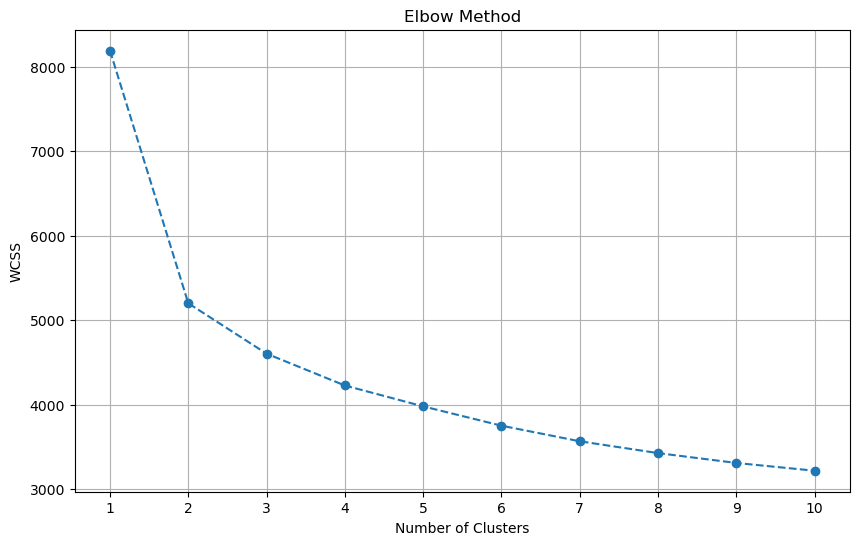

In [25]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming daily_dfs is your DataFrame with the data
thirty_df = pd.concat(dfs, axis = 0)
thirty_df.reset_index(inplace=True)
thirty_df.drop(["MP", "HIBID", "LOASK", "AP", "WBP", "WAP", "ENDT"], axis = 1,inplace=True)
X = thirty_df.to_numpy()
X = X[:,1:]
print(X.shape)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
normalized_X = scaler.fit_transform(X)

# Initialize list to store WCSS values
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(normalized_X)
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [26]:
scaler = MinMaxScaler()

# Normalize the data
normalized_X = scaler.fit_transform(thirty_df.values)

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10)

kmeans.fit(normalized_X)

KMeans(n_clusters=2, n_init=10)

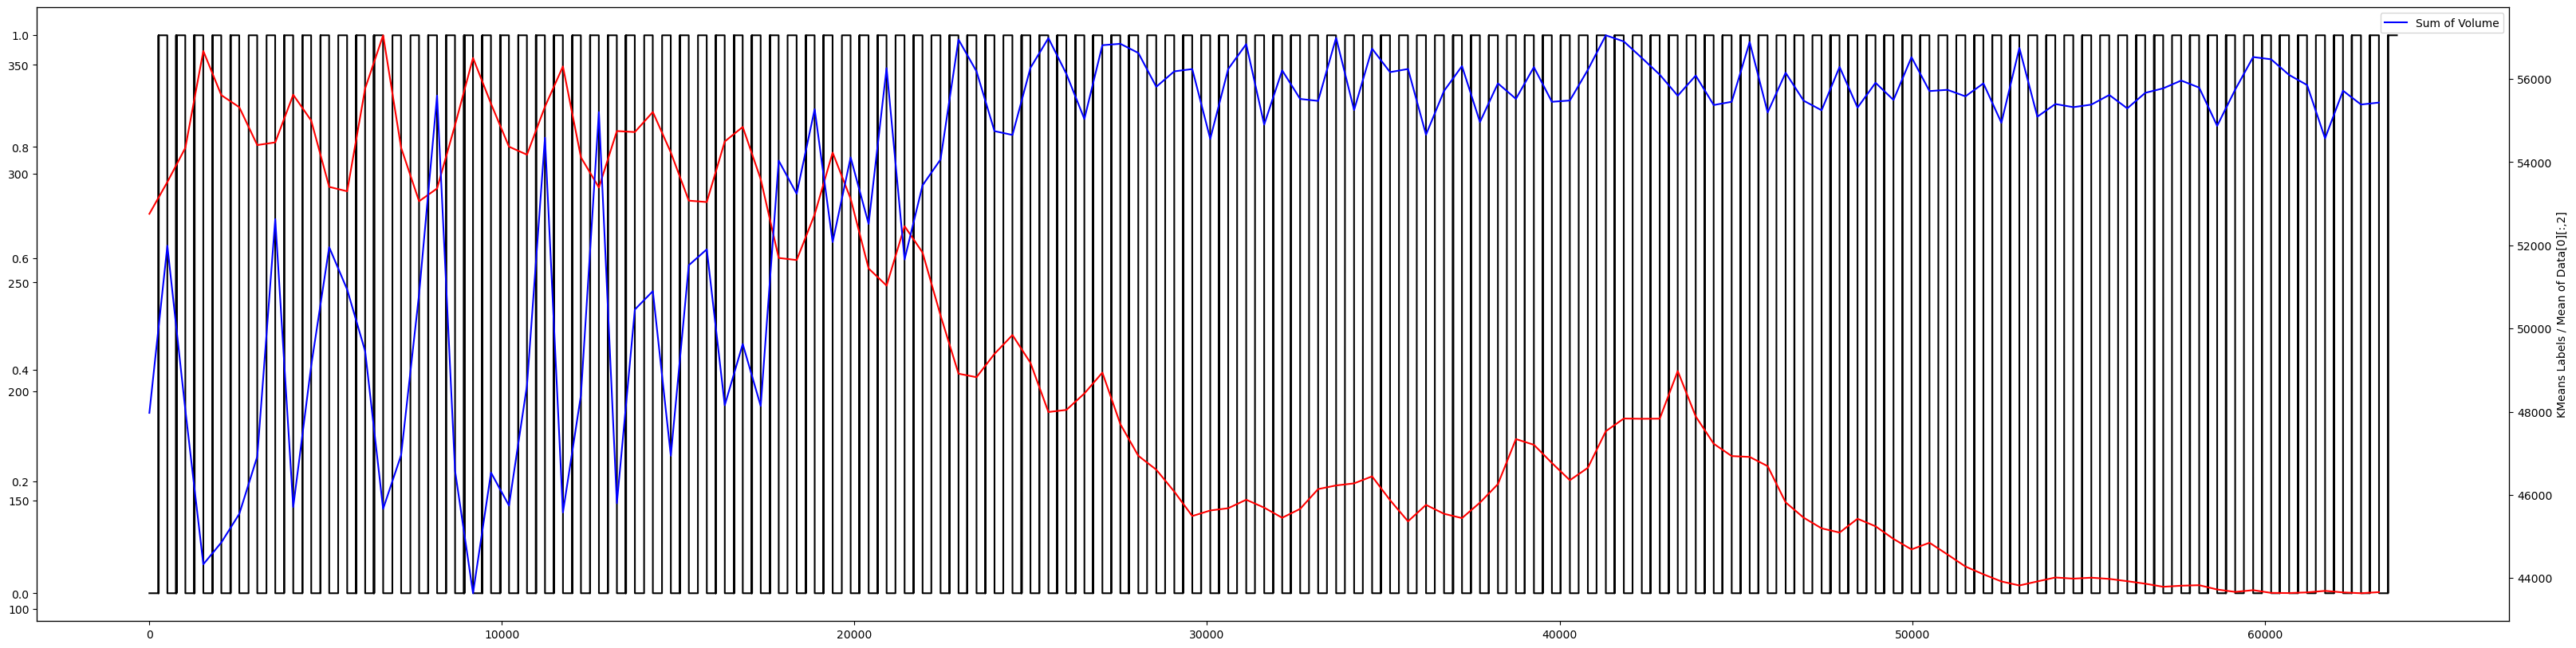

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
# Plot kmeans labels
plt.plot(kmeans.labels_, label='KMeans Labels', c = "black")

# Plot mean of data[0][:,2]
plt.twinx()
plt.plot(np.arange(1,125*510, 510),[np.mean(data[0][:,3]) for data in a[0]], 'r', label='Mean of Midprice')
plt.twinx()
plt.plot(np.arange(1,125*510, 510),[np.sum(data[0][:,9]) for data in a[0]], 'b', label='Sum of Volume')

# Add labels and legend
plt.xlabel('Data Point Index')
plt.ylabel('KMeans Labels / Mean of Data[0][:,2]')
plt.legend()

# Show plot
plt.show()
